In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice
from sklearn.metrics.cluster import homogeneity_score

## Loading and cleaning the data

In [ ]:
# Load data

df = pd.read_csv('BRCA.exp.547.med.txt', sep ="\t")
print(df)

          NAME  ...  TCGA-E2-A1BD-01A-11R-A12P-07
0        ELMO2  ...                     -0.601917
1      CREB3L1  ...                     -0.425500
2        RPS11  ...                      0.190625
3        PNMA1  ...                     -0.294750
4         MMP2  ...                      1.064167
...        ...  ...                           ...
17809  PIK3IP1  ...                     -0.588000
17810  SLC39A6  ...                      1.416900
17811   SNRPD2  ...                      0.137400
17812     AQP7  ...                      0.152500
17813     CTSC  ...                     -0.859000

[17814 rows x 548 columns]


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# display columns  
print(df.columns)

Index(['NAME', 'TCGA-A1-A0SD-01A-11R-A115-07', 'TCGA-A1-A0SE-01A-11R-A084-07',
       'TCGA-A1-A0SH-01A-11R-A084-07', 'TCGA-A1-A0SJ-01A-11R-A084-07',
       'TCGA-A1-A0SK-01A-12R-A084-07', 'TCGA-A1-A0SM-01A-11R-A084-07',
       'TCGA-A1-A0SO-01A-22R-A084-07', 'TCGA-A2-A04N-01A-11R-A115-07',
       'TCGA-A2-A04P-01A-31R-A034-07',
       ...
       'TCGA-E2-A15S-01A-11R-A115-07', 'TCGA-E2-A15T-01A-11R-A115-07',
       'TCGA-E2-A1AZ-01A-11R-A12P-07', 'TCGA-E2-A1B0-01A-11R-A12P-07',
       'TCGA-E2-A1B1-01A-21R-A12P-07', 'TCGA-E2-A1B4-01A-11R-A12P-07',
       'TCGA-E2-A1B5-01A-21R-A12P-07', 'TCGA-E2-A1B6-01A-31R-A12P-07',
       'TCGA-E2-A1BC-01A-11R-A12P-07', 'TCGA-E2-A1BD-01A-11R-A12P-07'],
      dtype='object', length=548)


In [ ]:
#display samples; first element is  NAME( Not a sample)
samples=df.columns[1:]
print(samples)

Index(['TCGA-A1-A0SD-01A-11R-A115-07', 'TCGA-A1-A0SE-01A-11R-A084-07',
       'TCGA-A1-A0SH-01A-11R-A084-07', 'TCGA-A1-A0SJ-01A-11R-A084-07',
       'TCGA-A1-A0SK-01A-12R-A084-07', 'TCGA-A1-A0SM-01A-11R-A084-07',
       'TCGA-A1-A0SO-01A-22R-A084-07', 'TCGA-A2-A04N-01A-11R-A115-07',
       'TCGA-A2-A04P-01A-31R-A034-07', 'TCGA-A2-A04Q-01A-21R-A034-07',
       ...
       'TCGA-E2-A15S-01A-11R-A115-07', 'TCGA-E2-A15T-01A-11R-A115-07',
       'TCGA-E2-A1AZ-01A-11R-A12P-07', 'TCGA-E2-A1B0-01A-11R-A12P-07',
       'TCGA-E2-A1B1-01A-21R-A12P-07', 'TCGA-E2-A1B4-01A-11R-A12P-07',
       'TCGA-E2-A1B5-01A-21R-A12P-07', 'TCGA-E2-A1B6-01A-31R-A12P-07',
       'TCGA-E2-A1BC-01A-11R-A12P-07', 'TCGA-E2-A1BD-01A-11R-A12P-07'],
      dtype='object', length=547)


In [ ]:
# extract number representing tumour or otherwise from the codes representing the samples

for sample in samples:
    code=sample[13:15]
        
    
    print(code)

01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
11
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
01
11
01
01
01
01
11
0

In [ ]:
# create a list of nature ( tumour or non-tumour): code for tumour=1 and code for non tumour=0
# igonred the codes for control samples
nature=[]
for sample in samples:
   
    code=int(sample[13:15])
    if code <10:
        target_code=1
    else:
        target_code=0
    nature.append(target_code)
print(nature)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 

In [ ]:
from collections import Counter


Counter(nature).keys() 
Counter(nature).values() 

dict_values([525, 22])

In [ ]:
# change the index 0, 1, 2 etc to the NAME values before doing the transpose
# for making features in the columns and samples in the rows
df.set_index('NAME', inplace=True)
print(df)

         TCGA-A1-A0SD-01A-11R-A115-07  ...  TCGA-E2-A1BD-01A-11R-A12P-07
NAME                                   ...                              
ELMO2                        0.220167  ...                     -0.601917
CREB3L1                      0.543750  ...                     -0.425500
RPS11                        0.354875  ...                      0.190625
PNMA1                        0.433500  ...                     -0.294750
MMP2                         1.065167  ...                      1.064167
...                               ...  ...                           ...
PIK3IP1                     -0.157500  ...                     -0.588000
SLC39A6                      0.190700  ...                      1.416900
SNRPD2                       0.047200  ...                      0.137400
AQP7                        -0.192500  ...                      0.152500
CTSC                        -0.719300  ...                     -0.859000

[17814 rows x 547 columns]


In [ ]:
# now doing the transpose
data=df.T
print(data)
data.shape

NAME                             ELMO2  CREB3L1  ...    AQP7    CTSC
TCGA-A1-A0SD-01A-11R-A115-07  0.220167  0.54375  ... -0.1925 -0.7193
TCGA-A1-A0SE-01A-11R-A084-07 -0.105500  0.00000  ... -0.5460 -0.8805
TCGA-A1-A0SH-01A-11R-A084-07  0.174583  1.36850  ... -0.6130 -0.4910
TCGA-A1-A0SJ-01A-11R-A084-07  0.590083 -0.45300  ...  2.0545 -0.4711
TCGA-A1-A0SK-01A-12R-A084-07  1.125417 -1.52800  ... -0.5640 -0.3590
...                                ...      ...  ...     ...     ...
TCGA-E2-A1B4-01A-11R-A12P-07 -0.638083  0.82750  ... -0.1930 -0.4631
TCGA-E2-A1B5-01A-21R-A12P-07 -0.497333 -0.96250  ...  0.2435  0.8299
TCGA-E2-A1B6-01A-31R-A12P-07 -0.324000  0.50950  ...  2.1415  0.9334
TCGA-E2-A1BC-01A-11R-A12P-07 -0.188083  0.73950  ...  3.9995 -0.8675
TCGA-E2-A1BD-01A-11R-A12P-07 -0.601917 -0.42550  ...  0.1525 -0.8590

[547 rows x 17814 columns]


(547, 17814)

In [ ]:
# create response varibale from the nature which is list representing tumour or otherwise in the form code
data['response']=nature

print(data['response'])

TCGA-A1-A0SD-01A-11R-A115-07    1
TCGA-A1-A0SE-01A-11R-A084-07    1
TCGA-A1-A0SH-01A-11R-A084-07    1
TCGA-A1-A0SJ-01A-11R-A084-07    1
TCGA-A1-A0SK-01A-12R-A084-07    1
                               ..
TCGA-E2-A1B4-01A-11R-A12P-07    1
TCGA-E2-A1B5-01A-21R-A12P-07    1
TCGA-E2-A1B6-01A-31R-A12P-07    1
TCGA-E2-A1BC-01A-11R-A12P-07    1
TCGA-E2-A1BD-01A-11R-A12P-07    1
Name: response, Length: 547, dtype: int64


In [ ]:
Y = data['response']

In [ ]:
print(data)

NAME                             ELMO2  CREB3L1  ...    CTSC  response
TCGA-A1-A0SD-01A-11R-A115-07  0.220167  0.54375  ... -0.7193         1
TCGA-A1-A0SE-01A-11R-A084-07 -0.105500  0.00000  ... -0.8805         1
TCGA-A1-A0SH-01A-11R-A084-07  0.174583  1.36850  ... -0.4910         1
TCGA-A1-A0SJ-01A-11R-A084-07  0.590083 -0.45300  ... -0.4711         1
TCGA-A1-A0SK-01A-12R-A084-07  1.125417 -1.52800  ... -0.3590         1
...                                ...      ...  ...     ...       ...
TCGA-E2-A1B4-01A-11R-A12P-07 -0.638083  0.82750  ... -0.4631         1
TCGA-E2-A1B5-01A-21R-A12P-07 -0.497333 -0.96250  ...  0.8299         1
TCGA-E2-A1B6-01A-31R-A12P-07 -0.324000  0.50950  ...  0.9334         1
TCGA-E2-A1BC-01A-11R-A12P-07 -0.188083  0.73950  ... -0.8675         1
TCGA-E2-A1BD-01A-11R-A12P-07 -0.601917 -0.42550  ... -0.8590         1

[547 rows x 17815 columns]


In [ ]:
print(data.head())

NAME                             ELMO2  CREB3L1  ...    CTSC  response
TCGA-A1-A0SD-01A-11R-A115-07  0.220167  0.54375  ... -0.7193         1
TCGA-A1-A0SE-01A-11R-A084-07 -0.105500  0.00000  ... -0.8805         1
TCGA-A1-A0SH-01A-11R-A084-07  0.174583  1.36850  ... -0.4910         1
TCGA-A1-A0SJ-01A-11R-A084-07  0.590083 -0.45300  ... -0.4711         1
TCGA-A1-A0SK-01A-12R-A084-07  1.125417 -1.52800  ... -0.3590         1

[5 rows x 17815 columns]


In [ ]:
data.describe()

NAME,ELMO2,CREB3L1,RPS11,PNMA1,MMP2,C10orf90,ZHX3,ERCC5,GPR98,RXFP3,APBB2,PRO0478,KLHL13,PRSSL1,PDCL3,DECR1,SALL1,CADM4,RPS18,HNRPD,CFHR5,SLC10A7,OR2K2,LMAN1,SUHW1,CHD8,SUMO1,GP1BA,DDB1,MYO9B,MMP7,CRNKL1,C9orf45,XAB2,RTN1,KLHL14,TBX10,CENPQ,UTY,ZBTB12,...,RNF6,VAV1,PDGFC,ZNF383,ARMCX2,PEPD,MGC42105,LSDP5,DAZ4,ZNF358,EIF2C4,RPS6KA3,PHF21A,FAM49B,PNPLA2,EAF2,ERCC2,C14orf101,VPS13B,ST18,PSMB9,LOC552889,CDC2L2,ProSAPiP1,TMEM16F,ADRBK2,HCLS1,GPR15,CSF2,SLC2A11,GRIP2,GPLD1,RAB8A,RXFP2,PIK3IP1,SLC39A6,SNRPD2,AQP7,CTSC,response
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,542.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,546.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,-0.000167,-0.005408,0.018381,-0.065037,-0.074444,0.252379,0.007024,-0.000391,-0.166210,0.008223,-0.073152,0.003582,0.126278,0.127436,0.012108,-0.016229,-0.013191,0.015993,-0.015000,-0.032050,0.020317,0.023756,0.009530,0.015962,0.124511,0.025773,0.000411,0.247831,-0.002219,0.002769,-0.302720,0.006448,0.027083,0.026945,0.062677,0.050696,0.175893,0.028000,-0.000642,-0.041808,...,0.011915,0.071879,-0.119232,0.010823,-0.258780,-0.024115,0.248186,-0.080821,0.036439,-0.015296,-0.034161,0.014412,0.019945,0.043287,-0.013565,0.116952,0.014336,0.006466,0.049116,0.076920,0.074245,-0.016898,-0.002386,0.111438,-0.001134,-0.001449,0.008577,0.003951,0.163811,0.011856,-0.017261,0.098146,0.004173,0.012682,-0.083575,0.162335,0.016307,0.367138,0.055690,0.959781
std,0.547277,0.819250,0.503550,0.609022,0.957383,0.980748,0.469728,0.490774,1.132159,0.367285,0.856199,0.366389,1.567204,0.538198,0.436397,0.684914,0.946379,0.644583,0.529168,0.419234,0.541340,0.409201,0.660345,0.636108,0.768276,0.450017,0.383811,0.901229,0.424975,0.375578,1.670882,0.561957,0.765862,0.427710,0.818114,0.668380,0.943032,0.600249,0.528990,0.489166,...,0.509656,0.897955,0.864626,0.410551,1.113714,0.559465,1.152631,1.046167,0.820450,0.500679,0.477610,0.717484,0.388072,0.711818,0.696102,1.048337,0.405007,0.591906,0.497759,0.524011,1.185480,0.511366,0.515397,0.741514,0.494399,0.671431,0.833970,0.373802,0.846448,0.464203,0.330794,0.821084,0.518305,0.681432,0.676153,1.794338,0.423155,1.220861,0.852395,0.196653
min,-1.811833,-2.303500,-1.436000,-1.818750,-2.725500,-3.120750,-1.518500,-1.570250,-2.587750,-1.634000,-2.945750,-1.060375,-3.240750,-0.892500,-1.469000,-3.378250,-3.159500,-2.462933,-1.825286,-1.409417,-1.715333,-1.237500,-2.627250,-1.899000,-1.830500,-1.379500,-1.376500,-1.431000,-1.537167,-1.228600,-7.657750,-1.438625,-1.778333,-1.403625,-1.788875,-2.042625,-1.678500,-1.672500,-1.975310,-2.988500,...,-1.727000,-2.140000,-3.088833,-1.443750,-4.329333,-3.060250,-1.960250,-3.155875,-2.969500,-2.249500,-1.638833,-2.018500,-1.259732,-2.143167,-2.100000,-2.119750,-1.082625,-2.216500,-1.377667,-1.045179,-3.071000,-1.655500,-1.440500,-1.405000,-2.068750,-2.247833,-2.220500,-2.117500,-1.852500,-1.905333,-1.803250,-1.995667,-1.675500,-3.167500,-2.873000,-4.187600,-1.105100,-2.064500,-1.876800,0.000000
25%,-0.366125,-0.621000,-0.320438,-0.464500,-0.752417,-0.315125,-0.255167,-0.327250,-1.179937,-0.204500,-0.610625,-0.251875,-1.079375,-0.177750,-0.288416,-0.396750,-0.639300,-0.399000,-0.378715,-0.282791,-0.299917,-0.234563,-0.360750,-0.418063,-0.361500,-0.255700,-0.239400,-0.413150,-0.27025

In [ ]:
# check if any NaN values 
data.isnull().values.any()

True

In [ ]:
# imputing for all NaN values -> conversion to 0
data = data.fillna(0)

In [ ]:
# Are NaN replaced by 0s? If false then yes
data.isnull().values.any()

False

In [ ]:
features=data.iloc[:,:-1]
print(features)
print(features.shape)

NAME                             ELMO2  CREB3L1  ...    AQP7    CTSC
TCGA-A1-A0SD-01A-11R-A115-07  0.220167  0.54375  ... -0.1925 -0.7193
TCGA-A1-A0SE-01A-11R-A084-07 -0.105500  0.00000  ... -0.5460 -0.8805
TCGA-A1-A0SH-01A-11R-A084-07  0.174583  1.36850  ... -0.6130 -0.4910
TCGA-A1-A0SJ-01A-11R-A084-07  0.590083 -0.45300  ...  2.0545 -0.4711
TCGA-A1-A0SK-01A-12R-A084-07  1.125417 -1.52800  ... -0.5640 -0.3590
...                                ...      ...  ...     ...     ...
TCGA-E2-A1B4-01A-11R-A12P-07 -0.638083  0.82750  ... -0.1930 -0.4631
TCGA-E2-A1B5-01A-21R-A12P-07 -0.497333 -0.96250  ...  0.2435  0.8299
TCGA-E2-A1B6-01A-31R-A12P-07 -0.324000  0.50950  ...  2.1415  0.9334
TCGA-E2-A1BC-01A-11R-A12P-07 -0.188083  0.73950  ...  3.9995 -0.8675
TCGA-E2-A1BD-01A-11R-A12P-07 -0.601917 -0.42550  ...  0.1525 -0.8590

[547 rows x 17814 columns]
(547, 17814)


In [ ]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
# convert features into numpy to enable use of sklearn
X=features.to_numpy()
print(type(X))
print(X)

<class 'numpy.ndarray'>
[[ 0.220167  0.54375   0.354875 ...  0.0472   -0.1925   -0.7193  ]
 [-0.1055    0.        0.305875 ... -0.0969   -0.546    -0.8805  ]
 [ 0.174583  1.3685    0.007    ... -0.2257   -0.613    -0.491   ]
 ...
 [-0.324     0.5095    0.9965   ...  0.2874    2.1415    0.9334  ]
 [-0.188083  0.7395    0.239625 ... -0.5966    3.9995   -0.8675  ]
 [-0.601917 -0.4255    0.190625 ...  0.1374    0.1525   -0.859   ]]


In [ ]:
print(X.shape) # 547 samples and 17814 genes 

(547, 17814)


## KMeans clustering without standardized data

In [ ]:
#Find the number of phenotypes in the data using an internal evalution measure (ex. silhouette) 
results = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k).fit(X)
  results.append(metrics.silhouette_score(X, kmeans.labels_,
                                 metric="euclidean", sample_size=300,))

In [ ]:
max_value = max(results)
k = results.index(max_value) + 2
print('The best value of k is ',k)
print("The Silhouette score is: %0.3f" % metrics.silhouette_score(X, kmeans.labels_))
kmeans = KMeans(n_clusters=k).fit(X)

The best value of k is  2
The Silhouette score is: 0.034


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


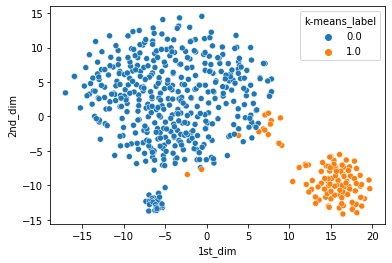

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne.shape
df_plot = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1], kmeans.labels_]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'k-means_label']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'k-means_label',data=df_plot, legend="full")

In [ ]:
#Find the number of phenotypes in the data using an external evalution measure (ex. based on response label) 
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score

results = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k).fit(X)
  results.append(homogeneity_score(Y,kmeans.labels_))

In [ ]:
max_value = max(results)
k = results.index(max_value) + 2
print('The best value of k is ',k)
print("The homogeneity score is: %0.3f" % metrics.homogeneity_score(Y, kmeans.labels_))
kmeans = KMeans(n_clusters=k).fit(X)

The best value of k is  8
The homogeneity score is: 0.925


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


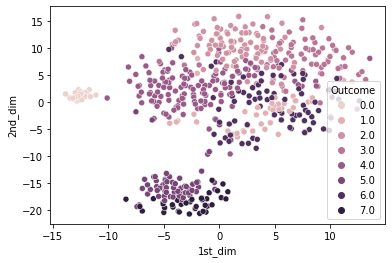

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(X)
X_tsne.shape
df_plot = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1], kmeans.labels_]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'Outcome']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'Outcome',data=df_plot, legend="full")

## Standardized data and then reclustering

In [ ]:
#Standardize the data. Then re-cluster the data, apply metrics, and find best k
scaler = StandardScaler()
scaler.fit(X)
X_st = scaler.transform(X)

In [ ]:
#Find the number of phenotypes in the data using an internal evalution measure (ex. silhouette) 
results = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k).fit(X_st)
  results.append(metrics.silhouette_score(X_st, kmeans.labels_,
                                 metric="euclidean", sample_size=300,))

In [ ]:
max_value = max(results)
k = results.index(max_value) + 2
print('The best value of k is ',k)
print("The silhouette score is: %0.3f" % metrics.silhouette_score(X_st, kmeans.labels_))
kmeans = KMeans(n_clusters=k).fit(X_st)

The best value of k is  2
The silhouette score is: 0.021


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


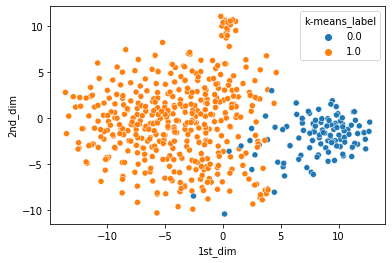

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(X_st)
X_tsne.shape
df_plot = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1], kmeans.labels_]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'k-means_label']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'k-means_label',data=df_plot, legend="full")

In [ ]:
#Find the number of phenotypes in the data using an external evalution measure (ex. based on response label) 
results = []
for k in range(2,11):
  kmeans = KMeans(n_clusters=k).fit(X_st)
  results.append(homogeneity_score(Y,kmeans.labels_))

In [ ]:
max_value = max(results)
k = results.index(max_value) + 2
print('The best value of k is ',k)
print("The homogeneity score is: %0.3f" % metrics.homogeneity_score(Y, kmeans.labels_))
kmeans = KMeans(n_clusters=k).fit(X_st)

The best value of k is  5
The homogeneity score is: 0.925


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


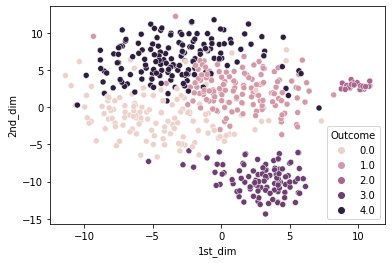

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(X_st)
X_tsne.shape
df_plot = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1], kmeans.labels_]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'Outcome']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'Outcome',data=df_plot, legend="full")

## Removing low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(1)
selector.fit_transform(X_st)
print(X_st.shape)
XLV = selector.fit_transform(X_st)
XLV1 = selector.transform(X_st)
print(XLV)
print("X_st with a fit transform", XLV.shape)
print(XLV1)
print("X_st with low variance transform", XLV1.shape)
print("X st is", X_st.shape)

(547, 17814)
[[ 2.41435374e-01  8.57765882e-01 -3.16269964e-01 ...  4.26896328e-01
   1.58224737e-02  7.30723880e-02]
 [ 8.79271386e-01 -4.45693904e-01 -1.03476773e+00 ... -2.17164466e-01
   8.01844919e-01 -2.67776272e-01]
 [-4.46256461e-01 -5.47717041e-01 -2.73928754e-01 ... -2.60101852e-01
  -7.52135515e-02 -5.72434894e-01]
 ...
 [ 1.42942372e+00 -4.13716502e-01 -3.89878530e-01 ... -6.41618419e-01
   7.22578870e-01  6.41232334e-01]
 [-2.21979024e-01 -3.23686422e+00 -9.05138491e-01 ... -2.03026984e-03
  -3.44584241e-01 -1.44974765e+00]
 [-4.61388359e-01 -2.67534097e-01  2.19326101e+00 ... -1.04773453e+00
   6.99819864e-01  2.86428038e-01]]
X_st with a fit transform (547, 2805)
[[ 2.41435374e-01  8.57765882e-01 -3.16269964e-01 ...  4.26896328e-01
   1.58224737e-02  7.30723880e-02]
 [ 8.79271386e-01 -4.45693904e-01 -1.03476773e+00 ... -2.17164466e-01
   8.01844919e-01 -2.67776272e-01]
 [-4.46256461e-01 -5.47717041e-01 -2.73928754e-01 ... -2.60101852e-01
  -7.52135515e-02 -5.72434894e-01

## ANOVA based feature selection

In [ ]:
# normalize on data


from sklearn.preprocessing import MinMaxScaler
#from sklearn import preprocessing
n = MinMaxScaler()
features_transformed = pd.DataFrame(n.fit_transform(X),columns = features.columns)


In [ ]:
#ANOVA based filtering


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

# feature selection
def select_features(X_st, Y):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_st, Y)
    # transform train input data
    X_fs = fs.transform(X_st)
    # transform test input data
    #X_test_fs = fs.transform(X_test)
    return X_fs, fs


# feature selection
X_fs, fs = select_features(features_transformed, Y)
# what are scores for the features

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))



Streaming output truncated to the last 5000 lines.
Feature 12814: 26.650430
Feature 12815: 4.652383
Feature 12816: 6.364413
Feature 12817: 3.242535
Feature 12818: 11.334903
Feature 12819: 4.248654
Feature 12820: 0.156555
Feature 12821: 5.066819
Feature 12822: 2.549668
Feature 12823: 57.461128
Feature 12824: 4.238482
Feature 12825: 25.464057
Feature 12826: 1.089590
Feature 12827: 1.242598
Feature 12828: 5.866847
Feature 12829: 0.062746
Feature 12830: 26.204710
Feature 12831: 21.609355
Feature 12832: 4.815945
Feature 12833: 93.113310
Feature 12834: 0.049613
Feature 12835: 81.785699
Feature 12836: 98.125151
Feature 12837: 13.342991
Feature 12838: 1.127447
Feature 12839: 97.078886
Feature 12840: 1.570889
Feature 12841: 8.557069
Feature 12842: 1.307749
Feature 12843: 15.845257
Feature 12844: 1.436215
Feature 12845: 0.205344
Feature 12846: 0.006183
Feature 12847: 1.671998
Feature 12848: 0.174983
Feature 12849: 26.410121
Feature 12850: 56.183857
Feature 12851: 1.408768
Feature 12852: 3.330638

In [ ]:
l=[(i, fs.scores_[i]) for i in range(len(fs.scores_))]
print(l) 

[(0, 29.443786711487242), (1, 38.94798686064899), (2, 33.7348155453796), (3, 3.026519904902013), (4, 1.317653149759799), (5, 101.13593643225445), (6, 1.501643647011325), (7, 11.958008759887532), (8, 0.041228215572249614), (9, 3.0854321834349743), (10, 2.399529082338701), (11, 14.965416624590675), (12, 117.9489865951181), (13, 3.0392233404562314), (14, 7.348621291910481), (15, 2.1579406340901), (16, 1.835088445665261), (17, 18.948720295132716), (18, 17.903900843155643), (19, 7.2036720062736475), (20, 0.7011120439855223), (21, 0.5569038287293835), (22, 0.06653185110544722), (23, 24.383904227186413), (24, 2.546880167020578), (25, 8.219106823765586), (26, 8.534833020677613), (27, 0.11874602112411702), (28, 26.451793525299706), (29, 44.931484590614346), (30, 14.455036700547552), (31, 18.355380053447828), (32, 5.517792667834345), (33, 0.32617662890301796), (34, 7.656717055807885), (35, 32.54700626703297), (36, 6.001063355559126), (37, 0.3754380657080789), (38, 4.167268092224374), (39, 2.8077

In [ ]:
# picked threshold >=310 score for feature selection since gives highest silhouette. Tested 10-310 to see which threshold was best.

counter=0
lst=[]
for i,j in l:
    if j>=310:
        counter+=1 
        lst.append((i,j))
        continue
        
print(counter) 
print(lst)

11
[(535, 321.5432982567218), (1126, 325.5392594755939), (4320, 487.96539980628705), (4435, 420.1194000587269), (5297, 313.2530174000995), (6181, 334.9220638859779), (7729, 347.7115821038242), (11684, 395.87450274548473), (16255, 335.7397079716034), (17119, 356.35915580912706), (17496, 349.4317775073399)]


In [ ]:
tuple_list = lst
first_tuple_elements = []

for a_tuple in tuple_list:
    first_tuple_elements.append(a_tuple[0])
print(first_tuple_elements)

[535, 1126, 4320, 4435, 5297, 6181, 7729, 11684, 16255, 17119, 17496]


In [ ]:
# applying filter to data
features_anova=features_transformed.iloc[:, first_tuple_elements]

In [ ]:

print(features_anova)
for col in features_anova.columns:
    print(col)

NAME  HSD17B13     HSPB6   COL10A1  ...       CA4   CD300LG     GLYAT
0     0.308439  0.136579  0.737101  ...  0.151113  0.193992  0.173642
1     0.401781  0.234843  0.728984  ...  0.371220  0.305257  0.204560
2     0.337203  0.261588  0.797908  ...  0.197986  0.236020  0.185995
3     0.446349  0.443994  0.723937  ...  0.507422  0.446996  0.514482
4     0.418646  0.052137  0.684838  ...  0.118597  0.144050  0.168012
..         ...       ...       ...  ...       ...       ...       ...
542   0.244202  0.387123  0.724970  ...  0.131752  0.320855  0.271350
543   0.359715  0.265720  0.549938  ...  0.318727  0.267389  0.203024
544   0.533590  0.380062  0.690888  ...  0.702323  0.508666  0.742375
545   0.643494  0.521223  0.712292  ...  0.704791  0.555546  0.487310
546   0.223661  0.137480  0.736280  ...  0.249862  0.054853  0.161079

[547 rows x 11 columns]
HSD17B13
HSPB6
COL10A1
LRRC3B
GPAM
CPA1
LOC55908
MMP11
CA4
CD300LG
GLYAT


## Comparing different algorithms 

In [ ]:
# Comparing different algorithms on the ANOVA

params = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(features_anova, quantile=params['quantile'])

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
        features_anova, n_neighbors=params['n_neighbors'], include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

scores = []
configs = []
silhouette = []
for k in range(2,11):

    # ============
    # Try different algorithms
    # ============
    #ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(features_anova)
    kmeans = cluster.MiniBatchKMeans(n_clusters=k).fit(features_anova)
    ward = cluster.AgglomerativeClustering(
        n_clusters=k, linkage='ward',
        connectivity=connectivity).fit(features_anova)
    spectral = cluster.SpectralClustering(
        n_clusters=k, eigen_solver='arpack',
        affinity="nearest_neighbors").fit(features_anova)
    dbscan = cluster.DBSCAN(eps=params['eps']).fit(features_anova)
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size']).fit(features_anova)
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference']).fit(features_anova)
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=k, connectivity=connectivity).fit(features_anova)
    birch = cluster.Birch(n_clusters=k).fit(features_anova)

    #silhouette.append(metrics.silhouette_score(XLV, ms.labels_))
    #scores.append(homogeneity_score(Y,ms.labels_))
    #configs.append("Mean-Shift; k=%d" % k)
    silhouette.append(metrics.silhouette_score(features_anova, kmeans.labels_))
    scores.append(homogeneity_score(Y,kmeans.labels_))
    configs.append("K-means; k=%d" % k)
    silhouette.append(metrics.silhouette_score(features_anova, ward.labels_))
    scores.append(homogeneity_score(Y,ward.labels_))
    configs.append("Ward; k=%d" % k)
    silhouette.append(metrics.silhouette_score(features_anova, spectral.labels_))
    scores.append(homogeneity_score(Y,spectral.labels_))
    configs.append("Spectral; k=%d" % k)
    scores.append(homogeneity_score(Y,dbscan.labels_))
    configs.append("DBSCAN; k=%d" % k)
    scores.append(homogeneity_score(Y,optics.labels_))
    configs.append("OPTICS; k=%d" % k)
    scores.append(homogeneity_score(Y,affinity_propagation.labels_))
    configs.append("Affinity_Propagation; k=%d" % k)
    silhouette.append(metrics.silhouette_score(features_anova, average_linkage.labels_))
    scores.append(homogeneity_score(Y,average_linkage.labels_))
    configs.append("Average linkage; k=%d" % k)
    silhouette.append(metrics.silhouette_score(features_anova, birch.labels_))
    scores.append(homogeneity_score(Y,birch.labels_))
    configs.append("Birch; k=%d" % k)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (3). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:717: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but Birch was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/

In [ ]:
max_value = max(scores)
pos = scores.index(max_value)
max_sil = max(silhouette)
sil_index = silhouette.index(max_sil)
#hom = scores.index(sil_index)
print(scores)
print(silhouette)
print('The best configuration based on silhouette score is:',configs[sil_index])
print("The silhouette score is: %0.3f" % max_sil)
#print("The best configuration homogeneity score based on silhouette is: %0.3f" % hom)

print('The best configuration based on homogeneity score is:',configs[pos])
print("The homogeneity score is: %0.3f" % max_value)



# spectral clustering was chosen as the best model as it had the best results when cell was executed for results
#random_seed was not set

[0.6100779476943835, 0.5080223492270174, 1.0, 0.5725639759557356, 0.0, 0.0, 0.7449917123127147, 0.8139676661784632, 0.955408235624797, 0.9460178050240289, 0.9456199318485614, 0.5725639759557356, 0.0, 0.0, 0.7449917123127148, 0.8139676661784632, 0.9490357038830604, 0.9460178050240335, 0.9458170431251044, 0.5725639759557356, 0.0, 0.0, 0.744991712312715, 0.8139676661784632, 1.0000000000000009, 0.9460178050240302, 0.950464234791769, 0.5725639759557356, 0.0, 0.0, 1.0000000000000002, 0.8139676661784632, 0.9999999999999977, 0.94601780502403, 0.9507740061700463, 0.5725639759557356, 0.0, 0.0, 1.0, 0.8139676661784632, 0.9517602635474903, 0.9460178050240319, 0.9517602635474872, 0.5725639759557356, 0.0, 0.0, 1.0, 0.8139676661784632, 0.999999999999998, 0.9460178050240315, 0.9536341580304123, 0.5725639759557356, 0.0, 0.0, 1.000000000000005, 0.8139676661784632, 1.0000000000000004, 0.9532325653408595, 0.954051204074733, 0.5725639759557356, 0.0, 0.0, 1.000000000000005, 0.8139676661784632, 0.96017245669

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


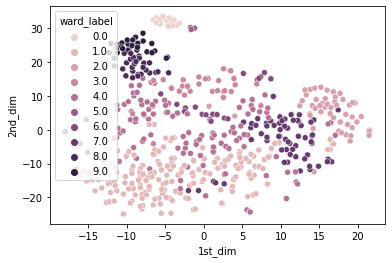

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(features_anova)
X_tsne.shape
df_plot = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1], ward.labels_]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'ward_label']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'ward_label',data=df_plot, legend="full")

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


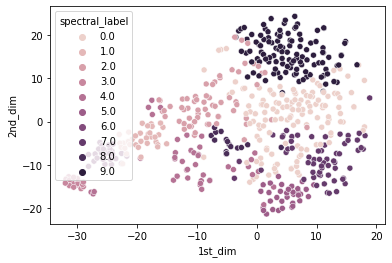

In [ ]:
X_tsne = TSNE(n_components=2).fit_transform(features_anova)
X_tsne.shape
df_plot = pd.DataFrame([X_tsne[:, 0], X_tsne[:, 1], spectral.labels_]).T
df_plot.columns = ['1st_dim', '2nd_dim', 'spectral_label']
sns.scatterplot(x='1st_dim', y='2nd_dim', hue = 'spectral_label',data=df_plot, legend="full")

In [ ]:
# MUST RUN WITHOUT ANOVA BLOCK if want to see x standardized with low variance and not normalized and ANOVA feature selected

# params = {'quantile': .3,
#                 'eps': .3,
#                 'damping': .9,
#                 'preference': -200,
#                 'n_neighbors': 10,
#                 'n_clusters': 3,
#                 'min_samples': 20,
#                 'xi': 0.05,
#                 'min_cluster_size': 0.1}

# # estimate bandwidth for mean shift
# bandwidth = cluster.estimate_bandwidth(XLV, quantile=params['quantile'])

# # connectivity matrix for structured Ward
# connectivity = kneighbors_graph(
#         XLV, n_neighbors=params['n_neighbors'], include_self=False)
# # make connectivity symmetric
# connectivity = 0.5 * (connectivity + connectivity.T)

# scores2 = []
# configs2 = []
# silhouette2 = []
# for k in range(2,11):

#     # ============
#     # Try different algorithms
#     # ============
#     ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(XLV)
#     kmeans = cluster.MiniBatchKMeans(n_clusters=k).fit(XLV)
#     ward = cluster.AgglomerativeClustering(
#         n_clusters=k, linkage='ward',
#         connectivity=connectivity).fit(XLV)
#     spectral = cluster.SpectralClustering(
#         n_clusters=k, eigen_solver='arpack',
#         affinity="nearest_neighbors").fit(XLV)
#     dbscan = cluster.DBSCAN(eps=params['eps']).fit(XLV)
#     optics = cluster.OPTICS(min_samples=params['min_samples'],
#                             xi=params['xi'],
#                             min_cluster_size=params['min_cluster_size']).fit(XLV)
#     affinity_propagation = cluster.AffinityPropagation(
#         damping=params['damping'], preference=params['preference']).fit(XLV)
#     average_linkage = cluster.AgglomerativeClustering(
#         linkage="average", affinity="cityblock",
#         n_clusters=k, connectivity=connectivity).fit(XLV)
#     birch = cluster.Birch(n_clusters=k).fit(XLV)

#     #silhouette.append(metrics.silhouette_score(XLV, ms.labels_))
#     scores2.append(homogeneity_score(Y,ms.labels_))
#     configs2.append("Mean-Shift; k=%d" % k)
#     silhouette2.append(metrics.silhouette_score(XLV, kmeans.labels_))
#     scores2.append(homogeneity_score(Y,kmeans.labels_))
#     configs2.append("K-means; k=%d" % k)
#     silhouette2.append(metrics.silhouette_score(XLV, ward.labels_))
#     scores2.append(homogeneity_score(Y,ward.labels_))
#     configs2.append("Ward; k=%d" % k)
#     silhouette2.append(metrics.silhouette_score(XLV, spectral.labels_))
#     scores2.append(homogeneity_score(Y,spectral.labels_))
#     configs2.append("Spectral; k=%d" % k)
#     scores2.append(homogeneity_score(Y,dbscan.labels_))
#     configs2.append("DBSCAN; k=%d" % k)
#     scores2.append(homogeneity_score(Y,optics.labels_))
#     configs2.append("OPTICS; k=%d" % k)
#     scores2.append(homogeneity_score(Y,affinity_propagation.labels_))
#     configs2.append("Affinity_Propagation; k=%d" % k)
#     silhouette2.append(metrics.silhouette_score(XLV, average_linkage.labels_))
#     scores2.append(homogeneity_score(Y,average_linkage.labels_))
#     configs2.append("Average linkage; k=%d" % k)
#     silhouette2.append(metrics.silhouette_score(XLV, birch.labels_))
#     scores2.append(homogeneity_score(Y,birch.labels_))
#     configs2.append("Birch; k=%d" % k)

In [ ]:
# max_value2 = max(scores2)
# pos2 = scores2.index(max_value2)
# max_sil2 = max(silhouette2)
# sil_index2 = silhouette2.index(max_sil2)
# #hom = scores.index(sil_index)
# print(scores2)
# print(silhouette2)
# print('The best configuration based on silhouette score is:',configs2[sil_index2])
# print("The silhouette score is: %0.3f" % max_sil2)
# #print("The best configuration homogeneity score based on silhouette is: %0.3f" % hom)

# print('The best configuration based on homogeneity score is:',configs2[pos2])
# print("The homogeneity score is: %0.3f" % max_value2)

[0.0, 0.10441007452777895, 0.04545575710844799, 0.9253731512682798, 0.0, 0.0, 0.9999999999999996, 0.0004454250699471119, 0.04761940898231957, 0.0, 0.3436972668843006, 0.9005585311339251, 0.9253731512682742, 0.0, 0.0, 0.9999999999999996, 0.0008916837246145482, 0.9005585311339329, 0.0, 0.33266160054360244, 0.9005585311339254, 0.9253731512682772, 0.0, 0.0, 0.9999999999999996, 0.0013387790902896952, 0.9005585311339316, 0.0, 0.32909393077932936, 0.9005585311339287, 0.9253731512682726, 0.0, 0.0, 0.9999999999999996, 0.001786714310874138, 0.9005585311339267, 0.0, 0.2726174737220454, 0.9005585311339301, 0.9253731512682746, 0.0, 0.0, 0.9999999999999996, 0.0022354925480667603, 0.9005585311339281, 0.0, 0.4370253876821519, 0.9005585311339298, 0.9253731512682729, 0.0, 0.0, 0.9999999999999996, 0.0026851169814162456, 0.9005585311339287, 0.0, 0.6420192921427419, 0.9005585311339303, 0.9253731512682729, 0.0, 0.0, 0.9999999999999996, 0.003135590808523928, 0.9005585311339298, 0.0, 0.9276501171529644, 0.900

In [ ]:
# MUST RUN WITHOUT ANOVA BLOCK if want to see x standardized and not normalized and ANOVA feature selected

# params = {'quantile': .3,
#                 'eps': .3,
#                 'damping': .9,
#                 'preference': -200,
#                 'n_neighbors': 10,
#                 'n_clusters': 3,
#                 'min_samples': 20,
#                 'xi': 0.05,
#                 'min_cluster_size': 0.1}

# # estimate bandwidth for mean shift
# bandwidth = cluster.estimate_bandwidth(X_st, quantile=params['quantile'])

# # connectivity matrix for structured Ward
# connectivity = kneighbors_graph(
#         X_st, n_neighbors=params['n_neighbors'], include_self=False)
# # make connectivity symmetric
# connectivity = 0.5 * (connectivity + connectivity.T)

# scores1 = []
# configs1 = []
# silhouette1 = []
# for k in range(2,11):

#     # ============
#     # Try different algorithms
#     # ============
#     ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True).fit(X_st)
#     kmeans = cluster.MiniBatchKMeans(n_clusters=k).fit(X_st)
#     ward = cluster.AgglomerativeClustering(
#         n_clusters=k, linkage='ward',
#         connectivity=connectivity).fit(X_st)
#     spectral = cluster.SpectralClustering(
#         n_clusters=k, eigen_solver='arpack',
#         affinity="nearest_neighbors").fit(X_st)
#     dbscan = cluster.DBSCAN(eps=params['eps']).fit(X_st)
#     '''optics = cluster.OPTICS(min_samples=params['min_samples'],
#                             xi=params['xi'],
#                             min_cluster_size=params['min_cluster_size']).fit(X_st)'''
#     affinity_propagation = cluster.AffinityPropagation(
#         damping=params['damping'], preference=params['preference']).fit(X_st)
#     average_linkage = cluster.AgglomerativeClustering(
#         linkage="average", affinity="cityblock",
#         n_clusters=k, connectivity=connectivity).fit(X_st)
#     birch = cluster.Birch(n_clusters=k).fit(X_st)


#     scores1.append(homogeneity_score(Y,ms.labels_))
#     configs1.append("Mean-Shift; k=%d" % k)
#     silhouette1.append(metrics.silhouette_score(X_st, kmeans.labels_))
#     scores1.append(homogeneity_score(Y,kmeans.labels_))
#     configs1.append("K-means; k=%d" % k)
#     silhouette1.append(metrics.silhouette_score(X_st, ward.labels_))
#     scores1.append(homogeneity_score(Y,ward.labels_))
#     configs1.append("Ward; k=%d" % k)
#     silhouette1.append(metrics.silhouette_score(X_st, spectral.labels_))
#     scores1.append(homogeneity_score(Y,spectral.labels_))
#     configs1.append("Spectral; k=%d" % k)
#     #silhouette1.append(metrics.silhouette_score(X_st, dbscan.labels_))
#     scores1.append(homogeneity_score(Y,dbscan.labels_))
#     configs1.append("DBSCAN; k=%d" % k)
#     #silhouette1.append(metrics.silhouette_score(X_st, optics.labels_))
#     '''scores1.append(homogeneity_score(Y,optics.labels_))
#     configs1.append("OPTICS; k=%d" % k)'''
#     #silhouette1.append(metrics.silhouette_score(X_st, affinity_propagation.labels_))
#     scores1.append(homogeneity_score(Y,affinity_propagation.labels_))
#     configs1.append("Affinity_Propagation; k=%d" % k)
#     silhouette1.append(metrics.silhouette_score(X_st, average_linkage.labels_))
#     scores1.append(homogeneity_score(Y,average_linkage.labels_))
#     configs1.append("Average linkage; k=%d" % k)
#     silhouette1.append(metrics.silhouette_score(X_st, birch.labels_))
#     scores1.append(homogeneity_score(Y,birch.labels_))
#     configs1.append("Birch; k=%d" % k)
    